# Import Libraries

In [138]:
import librosa as lr
import numpy as np
import os   
import matplotlib.pyplot as plt
from tqdm import tqdm

## Chuyển sang mfcc

In [152]:
def extract_features_mfcc(file_path, n_mfcc=50):
    # Load the audio file
    y, sr = lr.load(file_path, sr=16000)
    # Convert the audio to MFCC
    mfcc = lr.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)   
    return mfcc



In [142]:
def read_folder_and_convert_to_mfcc(folder_path):
    mfccs = []
    for file in tqdm(os.listdir(folder_path), desc=f"Processing {folder_path}"):
        if file.endswith('.wav'):
            file_path = os.path.join(folder_path, file)
            mfcc = extract_features_mfcc(file_path)
            mfccs.append(mfcc)
            
    
    mfccs = np.array(mfccs)
    return mfccs

In [143]:
def read_data_and_convert_to_mfcc(base_folder_path):
    data = {}
    for folder in ['train', 'test', 'val']:
        folder_path = os.path.join(base_folder_path, folder)
        if not os.path.exists(folder_path):
            continue
        
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                mfcc_matrix = read_folder_and_convert_to_mfcc(subfolder_path)
                data[subfolder + '_' + folder] = mfcc_matrix
    return data 



In [ ]:
# Example usage
# base_folder_path = r'C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset'
# data = read_data_and_convert_to_mfcc(base_folder_path)

In [145]:
import os
import numpy as np

def data_to_file_npy(data, base_folder_path, name_folder):
    # Create the main feature folder if it doesn't existdoesn't exist
    feature_folder = os.path.join(base_folder_path, name_folder)
    os.makedirs(feature_folder, exist_ok=True)
    # Create subfolders for train, test, and val
    for subfolder in ['train', 'test', 'val']:
        subfolder_path = os.path.join(feature_folder, subfolder)
        os.makedirs(subfolder_path, exist_ok=True)
        for key, value in data.items():
            if subfolder in key:
                file_path = os.path.join(subfolder_path, f'{key}.npy')
                np.save(file_path, value)
            
# # Example usage
# data_to_file_npy(data, base_folder_path)

In [125]:
def load_data_from_npy(base_folder_path):
    data = {}
    feature_folder = os.path.join(base_folder_path, 'feature_mfcc')
    for subfolder in ['train', 'test', 'val']:
        subfolder_path = os.path.join(feature_folder, subfolder)
        if os.path.exists(subfolder_path):
            for file in os.listdir(subfolder_path):
                if file.endswith('.npy'):
                    key = file.replace('.npy', '')
                    file_path = os.path.join(subfolder_path, file)
                    data[key] = np.load(file_path)
    return data

# Example usage
base_folder_path = r'C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset'
data = load_data_from_npy(base_folder_path)

In [126]:
for key, value in data.items():
    print(f"{key}: {value.shape}")

NonQueen_train_train: (7066, 13, 63)
Queen_train_train: (6788, 13, 63)
NonQueen_test: (1999, 13, 63)
Queen_test: (1998, 13, 63)
NonQueen_val: (830, 13, 63)
Queen_val: (1000, 13, 63)


In [127]:
X_train = np.vstack((np.mean(data['NonQueen_train_train'], axis=2), np.mean(data['Queen_train_train'], axis=2)))
y_train = np.vstack((np.zeros((data['NonQueen_train_train'].shape[0], 1)), np.ones((data['Queen_train_train'].shape[0], 1)))).reshape(-1,)
X_test = np.vstack((np.mean(data['NonQueen_test'], axis=2), np.mean(data['Queen_test'], axis=2)))
y_test = np.vstack((np.zeros((data['NonQueen_test'].shape[0], 1)), np.ones((data['Queen_test'].shape[0], 1)))).reshape(-1,)
X_val = np.vstack((np.mean(data['NonQueen_val'], axis=2), np.mean(data['Queen_val'], axis=2)))
y_val = np.vstack((np.zeros((data['NonQueen_val'].shape[0], 1)), np.ones((data['Queen_val'].shape[0], 1)))).reshape(-1,)

In [128]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

X_train: (13854, 13), y_train: (13854,)
X_test: (3997, 13), y_test: (3997,)
X_val: (1830, 13), y_val: (1830,)


In [129]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import GridSearchCV

# # Định nghĩa các siêu tham số cần tìm kiếm
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# # Khởi tạo mô hình SVM
# svm = SVC()

# # Thực hiện Grid Search với Cross Validation (cv=5)
# grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # In kết quả tốt nhất
# print("🔹 Best Parameters:", grid_search.best_params_)
# print("🔹 Best Score (Train CV):", grid_search.best_score_)

# # Đánh giá trên tập test
# best_svm = grid_search.best_estimator_
# y_pred = best_svm.predict(X_test)

# # Tính accuracy trên tập test
# test_acc = accuracy_score(y_test, y_pred)
# print("🔹 Test Accuracy:", test_acc)

# # In báo cáo chi tiết
# print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Không Scaler

In [130]:



from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# X_val_scaled = scaler.transform(X_val)

best_C = 1
best_val_acc = 0
best_test_acc = 0
test_accuracies = []
val_accuracies = []
c_values = list(range(1, 5))

for C in range(1, 5):
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train, y_train)

    # Evaluate on validation set
    y_pred_svm_val = svm.predict(X_val)
    val_acc_svm = accuracy_score(y_val, y_pred_svm_val)
    y_pred_svm_test = svm.predict(X_test)
    test_acc_svm = accuracy_score(y_test, y_pred_svm_test)
    print(f"C={C}, Validation Accuracy: {val_acc_svm}")
    print(f"C={C}, Test Accuracy: {test_acc_svm}")
    test_accuracies.append(test_acc_svm)
    val_accuracies.append(val_acc_svm)

    if val_acc_svm > best_val_acc:
        best_val_acc = val_acc_svm
        best_C = C

print(f"Best C: {best_C}, Best Validation Accuracy: {best_val_acc}")


C=1, Validation Accuracy: 0.7256830601092896
C=1, Test Accuracy: 0.7297973480110083
C=2, Validation Accuracy: 0.7333333333333333
C=2, Test Accuracy: 0.7423067300475357
C=3, Validation Accuracy: 0.7431693989071039
C=3, Test Accuracy: 0.7473104828621466
C=4, Validation Accuracy: 0.7519125683060109
C=4, Test Accuracy: 0.7503127345509132
Best C: 4, Best Validation Accuracy: 0.7519125683060109


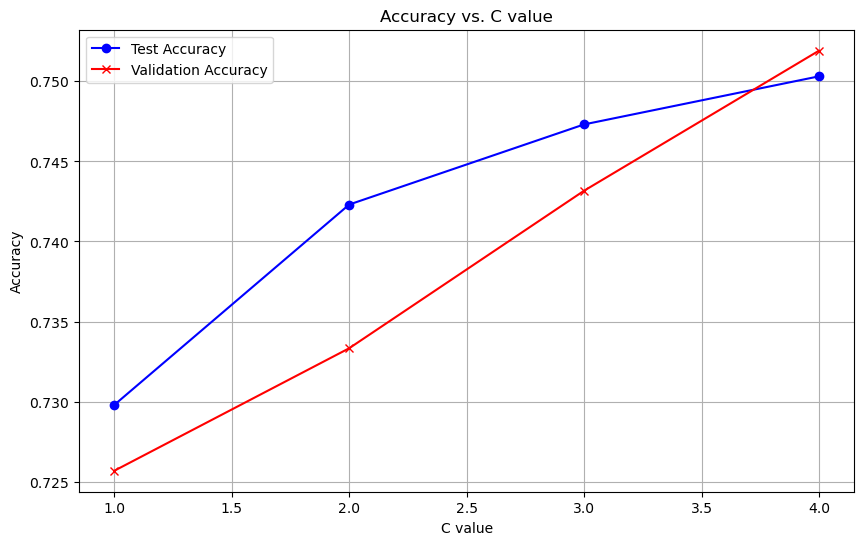

In [131]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(c_values, test_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.plot(c_values, val_accuracies, marker='x', linestyle='-', color='r', label='Validation Accuracy')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C value')
plt.legend()
plt.grid(True)
plt.show()

# Scaler

In [ ]:


from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

best_C = 1
best_val_acc = 0
best_test_acc = 0
c_values = list(range(1, 201))
test_accuracies = []
val_accuracies = []

for C in range(1, 201):
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train_scaled, y_train)

    # Evaluate on validation set
    y_pred_svm_val = svm.predict(X_val_scaled)
    val_acc_svm = accuracy_score(y_val, y_pred_svm_val)
    y_pred_svm_test = svm.predict(X_test_scaled)
    test_acc_svm = accuracy_score(y_test, y_pred_svm_test)
    print(f"C={C}, Validation Accuracy: {val_acc_svm}")
    print(f"C={C}, Test Accuracy: {test_acc_svm}")
    test_accuracies.append(test_acc_svm)
    val_accuracies.append(val_acc_svm)

    if val_acc_svm > best_val_acc:
        best_val_acc = val_acc_svm
        best_C = C

print(f"Best C: {best_C}, Best Validation Accuracy: {best_val_acc}")


C=1, Validation Accuracy: 0.9120218579234972
C=1, Test Accuracy: 0.9176882661996497
C=2, Validation Accuracy: 0.9169398907103825
C=2, Test Accuracy: 0.9236927695771829
C=3, Validation Accuracy: 0.9202185792349726
C=3, Test Accuracy: 0.9279459594696022
C=4, Validation Accuracy: 0.9251366120218579
C=4, Test Accuracy: 0.929196897673255
C=5, Validation Accuracy: 0.926775956284153
C=5, Test Accuracy: 0.9304478358769077
C=6, Validation Accuracy: 0.9278688524590164
C=6, Test Accuracy: 0.9311983987990993
C=7, Validation Accuracy: 0.9278688524590164
C=7, Test Accuracy: 0.9306980235176382
C=8, Validation Accuracy: 0.9278688524590164
C=8, Test Accuracy: 0.9316987740805605
C=9, Validation Accuracy: 0.9289617486338798
C=9, Test Accuracy: 0.9316987740805605
C=10, Validation Accuracy: 0.9306010928961749
C=10, Test Accuracy: 0.9329497122842132
C=11, Validation Accuracy: 0.9306010928961749
C=11, Test Accuracy: 0.932449337002752
C=12, Validation Accuracy: 0.9327868852459016
C=12, Test Accuracy: 0.931698

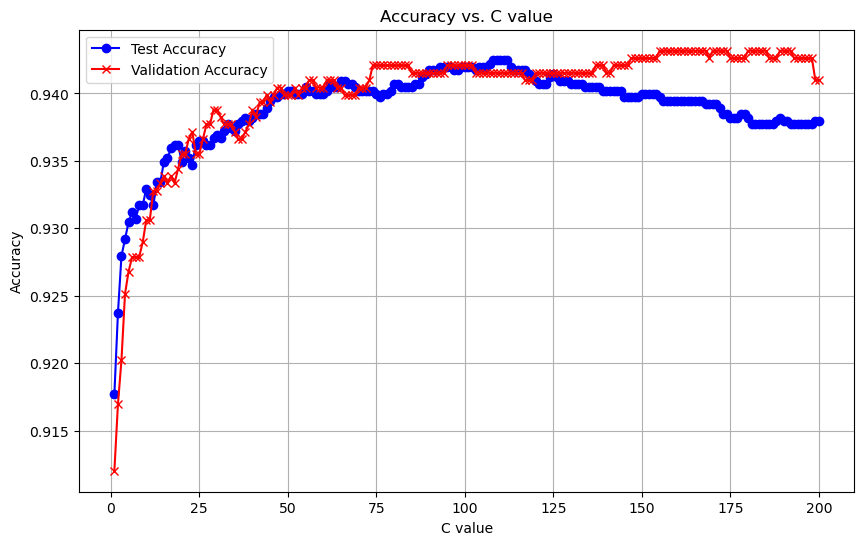

In [134]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(c_values, test_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.plot(c_values, val_accuracies, marker='x', linestyle='-', color='r', label='Validation Accuracy')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Train and evaluate Random Forest
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# # Evaluate on test set
# y_pred_rf_test = rf.predict(X_test)
# test_acc_rf = accuracy_score(y_test, y_pred_rf_test)
# print("🔹 Random Forest Test Accuracy:", test_acc_rf)

# # Evaluate on validation set
# y_pred_rf_val = rf.predict(X_val)
# val_acc_rf = accuracy_score(y_val, y_pred_rf_val)
# print("🔹 Random Forest Validation Accuracy:", val_acc_rf)


# # Train and evaluate K-Nearest Neighbors
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

# # Evaluate on test set
# y_pred_knn_test = knn.predict(X_test)
# test_acc_knn = accuracy_score(y_test, y_pred_knn_test)
# print("🔹 KNN Test Accuracy:", test_acc_knn)


# # Evaluate on validation set
# y_pred_knn_val = knn.predict(X_val)
# val_acc_knn = accuracy_score(y_val, y_pred_knn_val)
# print("🔹 KNN Validation Accuracy:", val_acc_knn)


In [144]:
# Example usage
base_folder_path = r'C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset'
data = read_data_and_convert_to_mfcc(base_folder_path)

Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\train\NonQueen_train: 100%|██████████| 7066/7066 [02:08<00:00, 55.07it/s]
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\train\Queen_train: 100%|██████████| 6788/6788 [01:57<00:00, 57.91it/s]
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\test\NonQueen: 100%|██████████| 1999/1999 [00:40<00:00, 49.06it/s]
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\test\Queen: 100%|██████████| 1998/1998 [00:49<00:00, 40.61it/s]
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\val\NonQueen: 100%|██████████| 830/830 [00:25<00:00, 32.16it/s]
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\val\Queen: 100%|██████████| 1000/1000 [00:31<00:00, 31.30it/s]


In [148]:

data_to_file_npy(data, base_folder_path, name_folder='feature_mfcc_20')

In [147]:
X_train = np.vstack((np.mean(data['NonQueen_train_train'], axis=2), np.mean(data['Queen_train_train'], axis=2)))
y_train = np.vstack((np.zeros((data['NonQueen_train_train'].shape[0], 1)), np.ones((data['Queen_train_train'].shape[0], 1)))).reshape(-1,)
X_test = np.vstack((np.mean(data['NonQueen_test'], axis=2), np.mean(data['Queen_test'], axis=2)))
y_test = np.vstack((np.zeros((data['NonQueen_test'].shape[0], 1)), np.ones((data['Queen_test'].shape[0], 1)))).reshape(-1,)
X_val = np.vstack((np.mean(data['NonQueen_val'], axis=2), np.mean(data['Queen_val'], axis=2)))
y_val = np.vstack((np.zeros((data['NonQueen_val'].shape[0], 1)), np.ones((data['Queen_val'].shape[0], 1)))).reshape(-1,)

In [149]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")


X_train: (13854, 20), y_train: (13854,)
X_test: (3997, 20), y_test: (3997,)
X_val: (1830, 20), y_val: (1830,)


In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

best_C = 1
best_val_acc = 0
best_test_acc = 0
c_values = list(range(1, 201))
test_accuracies = []
val_accuracies = []

for C in range(1, 201):
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train_scaled, y_train)

    # Evaluate on validation set
    y_pred_svm_val = svm.predict(X_val_scaled)
    val_acc_svm = accuracy_score(y_val, y_pred_svm_val)
    y_pred_svm_test = svm.predict(X_test_scaled)
    test_acc_svm = accuracy_score(y_test, y_pred_svm_test)
    print(f"C={C}, Validation Accuracy: {val_acc_svm}")
    print(f"C={C}, Test Accuracy: {test_acc_svm}")
    test_accuracies.append(test_acc_svm)
    val_accuracies.append(val_acc_svm)

    if val_acc_svm > best_val_acc:
        best_val_acc = val_acc_svm
        best_C = C

print(f"Best C: {best_C}, Best Validation Accuracy: {best_val_acc}")


C=1, Validation Accuracy: 0.9415300546448088
C=1, Test Accuracy: 0.9457092819614711
C=2, Validation Accuracy: 0.9480874316939891
C=2, Test Accuracy: 0.9514635976982737
C=3, Validation Accuracy: 0.9497267759562842
C=3, Test Accuracy: 0.9552164123092319
C=4, Validation Accuracy: 0.9519125683060109
C=4, Test Accuracy: 0.9572179134350763
C=5, Validation Accuracy: 0.953551912568306
C=5, Test Accuracy: 0.9569677257943457
C=6, Validation Accuracy: 0.9530054644808743
C=6, Test Accuracy: 0.9582186639979985
C=7, Validation Accuracy: 0.9546448087431694
C=7, Test Accuracy: 0.9594696022016512
C=8, Validation Accuracy: 0.9573770491803278
C=8, Test Accuracy: 0.9602201651238429
C=9, Validation Accuracy: 0.9579234972677596
C=9, Test Accuracy: 0.9602201651238429
C=10, Validation Accuracy: 0.9590163934426229
C=10, Test Accuracy: 0.9602201651238429
C=11, Validation Accuracy: 0.9595628415300547
C=11, Test Accuracy: 0.9602201651238429
C=12, Validation Accuracy: 0.9595628415300547
C=12, Test Accuracy: 0.9609

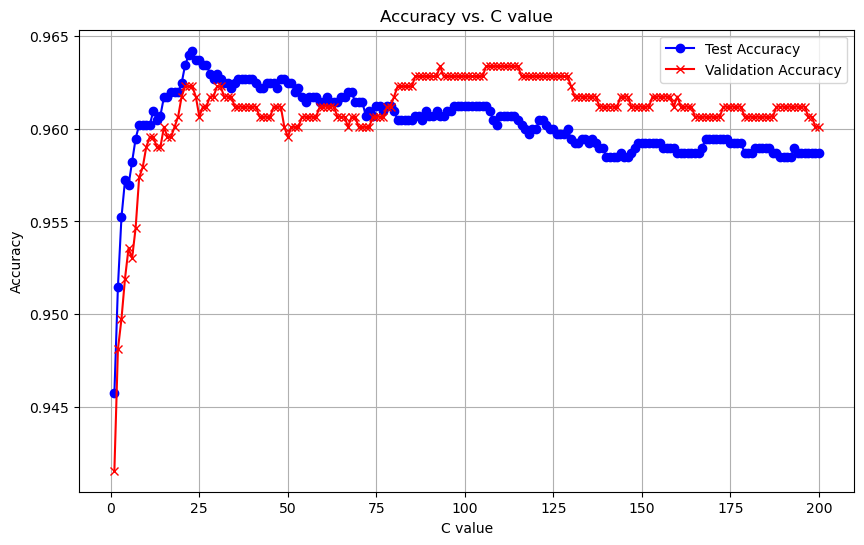

In [151]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(c_values, test_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.plot(c_values, val_accuracies, marker='x', linestyle='-', color='r', label='Validation Accuracy')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C value')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
base_folder_path = r'C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset'
data = read_data_and_convert_to_mfcc(base_folder_path)

Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\train\NonQueen_train: 100%|██████████| 7066/7066 [01:47<00:00, 65.58it/s] 
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\train\Queen_train: 100%|██████████| 6788/6788 [01:15<00:00, 89.46it/s] 
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\test\NonQueen: 100%|██████████| 1999/1999 [00:14<00:00, 138.42it/s]
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\test\Queen: 100%|██████████| 1998/1998 [00:13<00:00, 149.44it/s]
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\val\NonQueen: 100%|██████████| 830/830 [00:05<00:00, 149.21it/s]
Processing C:\Users\manhm\Desktop\Project AIL\20k_audio_splitted_dataset\val\Queen: 100%|██████████| 1000/1000 [00:06<00:00, 152.03it/s]


In [154]:
for key, value in data.items():
    print(f"{key} mfcc_50: {value.shape}")

NonQueen_train_train mfcc_50: (7066, 50, 63)
Queen_train_train mfcc_50: (6788, 50, 63)
NonQueen_test mfcc_50: (1999, 50, 63)
Queen_test mfcc_50: (1998, 50, 63)
NonQueen_val mfcc_50: (830, 50, 63)
Queen_val mfcc_50: (1000, 50, 63)


In [156]:
data_to_file_npy(data, base_folder_path, name_folder='feature_mfcc_50')

In [157]:
X_train = np.vstack((np.mean(data['NonQueen_train_train'], axis=2), np.mean(data['Queen_train_train'], axis=2)))
y_train = np.vstack((np.zeros((data['NonQueen_train_train'].shape[0], 1)), np.ones((data['Queen_train_train'].shape[0], 1)))).reshape(-1,)
X_test = np.vstack((np.mean(data['NonQueen_test'], axis=2), np.mean(data['Queen_test'], axis=2)))
y_test = np.vstack((np.zeros((data['NonQueen_test'].shape[0], 1)), np.ones((data['Queen_test'].shape[0], 1)))).reshape(-1,)
X_val = np.vstack((np.mean(data['NonQueen_val'], axis=2), np.mean(data['Queen_val'], axis=2)))
y_val = np.vstack((np.zeros((data['NonQueen_val'].shape[0], 1)), np.ones((data['Queen_val'].shape[0], 1)))).reshape(-1,)

In [158]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

X_train: (13854, 50), y_train: (13854,)
X_test: (3997, 50), y_test: (3997,)
X_val: (1830, 50), y_val: (1830,)


In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

best_C = 1
best_val_acc = 0
best_test_acc = 0
c_values = list(range(1, 201))
test_accuracies = []
val_accuracies = []

for C in range(1, 201):
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train_scaled, y_train)

    # Evaluate on validation set
    y_pred_svm_val = svm.predict(X_val_scaled)
    val_acc_svm = accuracy_score(y_val, y_pred_svm_val)
    y_pred_svm_test = svm.predict(X_test_scaled)
    test_acc_svm = accuracy_score(y_test, y_pred_svm_test)
    print(f"C={C}, Validation Accuracy: {val_acc_svm}")
    print(f"C={C}, Test Accuracy: {test_acc_svm}")
    test_accuracies.append(test_acc_svm)
    val_accuracies.append(val_acc_svm)

    if val_acc_svm > best_val_acc:
        best_val_acc = val_acc_svm
        best_C = C

print(f"Best C: {best_C}, Best Validation Accuracy: {best_val_acc}")

C=1, Validation Accuracy: 0.9721311475409836
C=1, Test Accuracy: 0.9724793595196397
C=2, Validation Accuracy: 0.9765027322404372
C=2, Test Accuracy: 0.9759819864898674
C=3, Validation Accuracy: 0.980327868852459
C=3, Test Accuracy: 0.9782336752564423
C=4, Validation Accuracy: 0.980327868852459
C=4, Test Accuracy: 0.9797348011008257
C=5, Validation Accuracy: 0.978688524590164
C=5, Test Accuracy: 0.9814861145859395
C=6, Validation Accuracy: 0.980327868852459
C=6, Test Accuracy: 0.9822366775081312
C=7, Validation Accuracy: 0.9797814207650273
C=7, Test Accuracy: 0.9829872404303227
C=8, Validation Accuracy: 0.980327868852459
C=8, Test Accuracy: 0.9834876157117839
C=9, Validation Accuracy: 0.9797814207650273
C=9, Test Accuracy: 0.9829872404303227
C=10, Validation Accuracy: 0.9797814207650273
C=10, Test Accuracy: 0.9824868651488616
C=11, Validation Accuracy: 0.9797814207650273
C=11, Test Accuracy: 0.9824868651488616
C=12, Validation Accuracy: 0.980327868852459
C=12, Test Accuracy: 0.982486865

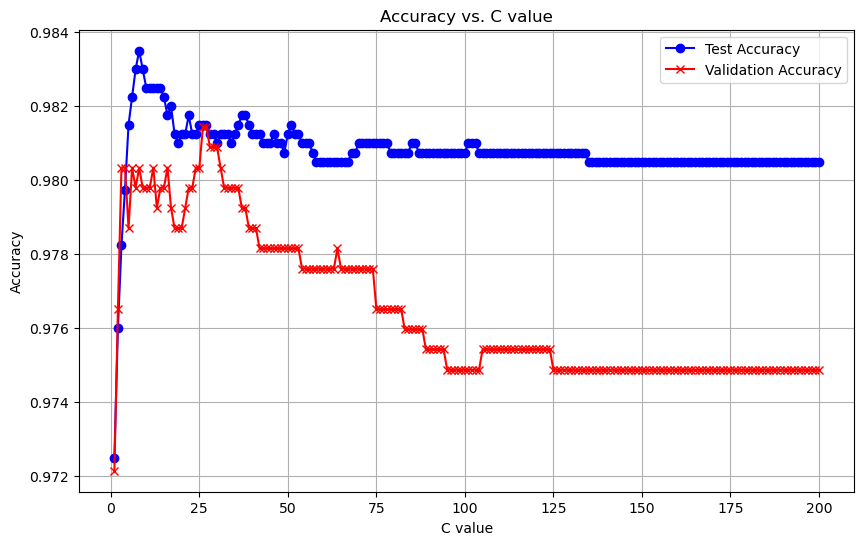

In [160]:
# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(c_values, test_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.plot(c_values, val_accuracies, marker='x', linestyle='-', color='r', label='Validation Accuracy')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C value')
plt.legend()
plt.grid(True)
plt.show()